In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [32]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
tf.version

[]


<module 'tensorflow._api.v2.version' from 'c:\\Users\\ompat\\OneDrive\\Desktop\\Skin-Cancer-Classification\\venv\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\ompat\OneDrive\Desktop\mini_proj_data\processed_data.csv')
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,label_id,is_malignant,clean_path,variant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\Users\ompat\OneDrive\Desktop\mini_proj_data...,2,0,C:/Users/ompat/OneDrive/Desktop/mini_proj_data...,clean
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\Users\ompat\OneDrive\Desktop\mini_proj_data...,2,0,C:/Users/ompat/OneDrive/Desktop/mini_proj_data...,clean
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\Users\ompat\OneDrive\Desktop\mini_proj_data...,2,0,C:/Users/ompat/OneDrive/Desktop/mini_proj_data...,clean
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\Users\ompat\OneDrive\Desktop\mini_proj_data...,2,0,C:/Users/ompat/OneDrive/Desktop/mini_proj_data...,clean
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\Users\ompat\OneDrive\Desktop\mini_proj_data...,2,0,C:/Users/ompat/OneDrive/Desktop/mini_proj_data...,clean


In [3]:
import cv2
import numpy as np

In [4]:
X = data['clean_path']

In [5]:
def load_and_preprocess_image(path, target_size=(224,224)):
    img = cv2.imread(path)                      # read image  
    
    
    return img


X_images=np.array([load_and_preprocess_image(p) for p in X])

In [6]:
X_images.shape

(10015, 224, 224, 3)

In [7]:
X_images

array([[[[173, 132, 169],
         [183, 142, 179],
         [186, 143, 180],
         ...,
         [162, 148, 189],
         [168, 150, 191],
         [176, 158, 199]],

        [[173, 132, 170],
         [186, 145, 182],
         [194, 151, 188],
         ...,
         [161, 147, 188],
         [177, 161, 202],
         [172, 156, 197]],

        [[173, 133, 174],
         [179, 140, 178],
         [184, 143, 181],
         ...,
         [158, 146, 188],
         [170, 158, 200],
         [165, 151, 193]],

        ...,

        [[109,  80, 113],
         [111,  84, 117],
         [115,  88, 121],
         ...,
         [183, 160, 192],
         [169, 150, 183],
         [155, 138, 171]],

        [[104,  77, 110],
         [106,  79, 112],
         [109,  82, 116],
         ...,
         [190, 166, 198],
         [169, 148, 180],
         [159, 141, 172]],

        [[102,  75, 108],
         [102,  75, 108],
         [101,  76, 110],
         ...,
         [191, 167, 199],
        

In [11]:
X_images = (X_images-np.mean(X_images))/np.std(X_images)

In [12]:
X_images

array([[[[ 3.19060973e-01, -5.48400186e-01,  2.34430616e-01],
         [ 5.30636866e-01, -3.36824294e-01,  4.46006509e-01],
         [ 5.94109634e-01, -3.15666704e-01,  4.67164098e-01],
         ...,
         [ 8.63274916e-02, -2.09878758e-01,  6.57582402e-01],
         [ 2.13273027e-01, -1.67563580e-01,  6.99897580e-01],
         [ 3.82533741e-01,  1.69713452e-03,  8.69158294e-01]],

        [[ 3.19060973e-01, -5.48400186e-01,  2.55588206e-01],
         [ 5.94109634e-01, -2.73351526e-01,  5.09479277e-01],
         [ 7.63370348e-01, -1.46405990e-01,  6.36424812e-01],
         ...,
         [ 6.51699023e-02, -2.31036347e-01,  6.36424812e-01],
         [ 4.03691330e-01,  6.51699023e-02,  9.32631062e-01],
         [ 2.97903384e-01, -4.06180440e-02,  8.26843116e-01]],

        [[ 3.19060973e-01, -5.27242597e-01,  3.40218563e-01],
         [ 4.46006509e-01, -3.79139472e-01,  4.24848920e-01],
         [ 5.51794455e-01, -3.15666704e-01,  4.88321687e-01],
         ...,
         [ 1.69713452e-0

In [13]:
from tensorflow.keras import Model, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, Input
import tensorflow as tf

# ---------------- CNN1 ----------------
def build_cnn1(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(64, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(128, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(256, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)   # still useful to avoid overfitting
    return Model(inputs, x, name="CNN1")

# ---------------- CNN2 ----------------
def build_cnn2(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(256, (7,7), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = AveragePooling2D((2,2))(x)

    x = Conv2D(128, (5,5), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((2,2))(x)

    x = Conv2D(96, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((2,2))(x)

    x = Conv2D(96, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((2,2))(x)

    x = Flatten()(x)
    x = Dropout(0.5)(x)
    return Model(inputs, x, name="CNN2")

# ---------------- CNN3 ----------------
def build_cnn3(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(96, (5,5), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(128, (5, 5), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(256, (7, 7), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)   # still useful to avoid overfitting
    return Model(inputs, x, name="CNN3")


# ---------------- CNN4 ----------------
def build_cnn4(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = AveragePooling2D((3,3))(x)

    x = Conv2D(32, (3,3), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((5,5))(x)

    x = Conv2D(64, (5,5), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((3,3))(x)

    x = Conv2D(128, (5,5), activation='relu', padding="same",
               kernel_regularizer=regularizers.l2(1e-4))(x)
    x = AveragePooling2D((3,3))(x)

    x = Flatten()(x)
    x = Dropout(0.5)(x)
    return Model(inputs, x, name="CNN4")


In [14]:
input_shape = (224, 224, 3)
CNN1 = build_cnn1(input_shape)
CNN2 = build_cnn2(input_shape)
CNN3 = build_cnn3(input_shape)
CNN4 = build_cnn4(input_shape)
print("---- CNN1 Summary ----")
CNN1.summary()

print("\n---- CNN2 Summary ----")
CNN2.summary()

print("\n---- CNN3 Summary ----")
CNN3.summary()

print("\n---- CNN4 Summary ----")
CNN4.summary()
# Use augmented data for feature extraction
# train_generator = datagen.flow(X_train_images, y_train, batch_size=32, shuffle=False)

---- CNN1 Summary ----


Model: "CNN1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50176)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,416 (1.48 MB)

 Trainable params: 388,416 (1.48 MB)

 Non-trainable params: 0 (0.00 B)


---- CNN2 Summary ----


Model: "CNN2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 256)  │        37,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 112, 112, 256)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 56, 56, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 96)     │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 28, 28, 96)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 14, 14, 96)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18816)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,944 (4.01 MB)

 Trainable params: 1,050,944 (4.01 MB)

 Non-trainable params: 0 (0.00 B)


---- CNN3 Summary ----


Model: "CNN3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 96)   │        76,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       307,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50176)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,991,008 (7.60 MB)

 Trainable params: 1,991,008 (7.60 MB)

 Non-trainable params: 0 (0.00 B)


---- CNN4 Summary ----


Model: "CNN4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 74, 74, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 74, 74, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 14, 14, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 4, 4, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 1, 1, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,336 (1.02 MB)

 Trainable params: 266,336 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
features_cnn1 = CNN1.predict(X_images, verbose=1)
features_cnn2 = CNN2.predict(X_images, verbose=1)
features_cnn3 = CNN3.predict(X_images, verbose=1)
features_cnn4 = CNN4.predict(X_images, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1013s 3s/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


In [24]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  0
GPU Devices: []


In [25]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

False
0


AssertionError: Torch not compiled with CUDA enabled

In [34]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
all_features = np.concatenate([features_cnn1, features_cnn2], axis=1)
features_pca = pca.fit_transform(all_features)

# later you can split back if needed


In [18]:
from sklearn.decomposition import FactorAnalysis

# Concatenate features from CNN3 and CNN4
all_features_dual2 = np.concatenate([features_cnn3, features_cnn4], axis=1)

# Apply Factor Analysis to reduce dimensionality
fa = FactorAnalysis(n_components=50, random_state=42)
features_fa = fa.fit_transform(all_features_dual2)

# features_fa now contains the reduced features for dual2

In [20]:
# Step 1: Merge features from both Dual CNNs
# features_pca: reduced features from Dual-1 (PCA)
# features_fa: reduced features from Dual-2 (FA)
merged_features = np.concatenate([features_pca, features_fa], axis=1)

# Step 2: Remove duplicate features (columns)
# Convert to DataFrame for easy duplicate removal
import pandas as pd
merged_df = pd.DataFrame(merged_features)
# Remove duplicate columns
merged_df = merged_df.loc[:, ~merged_df.T.duplicated()]




# Step 1: Train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    merged_df.values, data['label_id'].values, test_size=0.3, random_state=42, stratify=data['label_id']
)

# Step 2: Validation + Test (split from temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (7010, 100) (7010,)
Val:   (2003, 100) (2003,)
Test:  (1002, 100) (1002,)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# ---------------- Classifier ----------------
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
# Early stopping callback



c:\Users\ompat\OneDrive\Desktop\Skin-Cancer-Classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,463 (263.53 KB)

 Trainable params: 67,463 (263.53 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    X_train, y_train,   # <-- use your numpy labels directly
    validation_data=(X_val, y_val),
    epochs=80,
    batch_size=128,
    # callback s=[early_stop],
       # <- stops when val_acc stops improving
    verbose=1
)

Epoch 1/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6669 - loss: 1.0159 - val_accuracy: 0.7214 - val_loss: 0.8102
Epoch 2/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7033 - loss: 0.8219 - val_accuracy: 0.7324 - val_loss: 0.7561
Epoch 3/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.7497 - val_accuracy: 0.7364 - val_loss: 0.7420
Epoch 4/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7340 - loss: 0.7150 - val_accuracy: 0.7479 - val_loss: 0.6985
Epoch 5/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7501 - loss: 0.6763 - val_accuracy: 0.7474 - val_loss: 0.6940
Epoch 6/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7626 - loss: 0.6498 - val_accuracy: 0.7529 - val_loss: 0.6790
Epoch 7/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7645 - loss: 0.6316 - val_accuracy: 0.7579 - val_loss: 0.6730
Epoch 8/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7730 - loss: 0.6134 - val_accuracy: 0.7609 - val_loss:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 1.2126
✅ Test Accuracy: 0.7415
✅ Test Loss: 1.2126
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.4375    0.4242    0.4308        33
           1     0.5682    0.4902    0.5263        51
           2     0.4530    0.4818    0.4670       110
           3     0.1429    0.0909    0.1111        11
           4     0.4886    0.3839    0.4300       112
           5     0.8620    0.9031    0.8821       671
           6     0.0909    0.0714    0.0800        14

    accuracy                         0.7415      1002
   macro avg     0.4347    0.4065    0.4182      1002
weighted avg     0.7278    0.7415    0.7333      1002



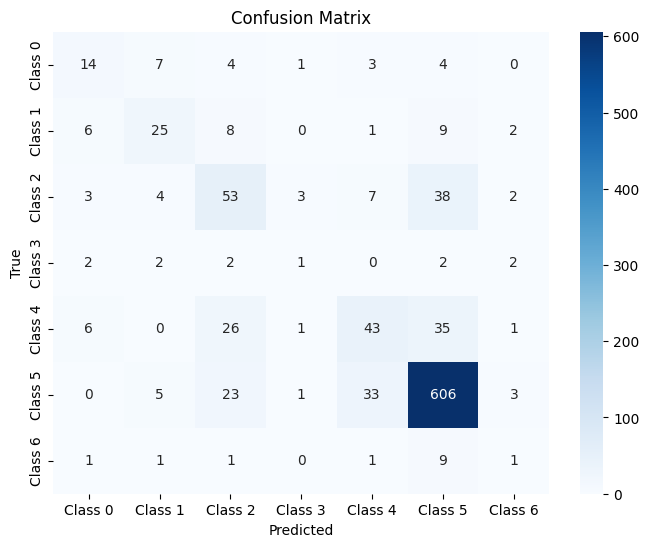

 ROC-AUC (macro): 0.9044


In [23]:
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
def metrics():
    # Evaluate model on test data
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"✅ Test Loss: {test_loss:.4f}")
    
    y_pred_probs = model.predict(X_test)             # probabilities (N, 7)
    y_pred = np.argmax(y_pred_probs, axis=1)  
    

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4)) 
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f"Class {i}" for i in range(7)],
                yticklabels=[f"Class {i}" for i in range(7)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    # Binarize test labels (one-hot for ROC)
    y_test_bin = label_binarize(y_test, classes=np.arange(7))

    # ROC-AUC (macro average)
    roc_auc = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")
    print(f" ROC-AUC (macro): {roc_auc:.4f}")
    
metrics()